# Linearization
<sub>Section 1.e - Linearization</sub>

In this section, we'll go more in depth on how linearization works in python

### Dependencies Required
- pylab
- numpy

In [2]:
from pylab import plot, show, scatter
from numpy import array, polyfit 

### Using a Scatter Plot to Linearize

Let's assume our scatter plot looked like the following:

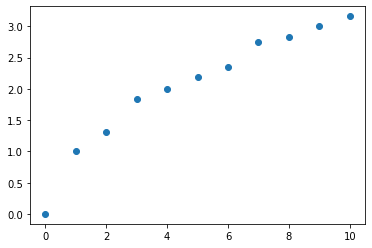

In [7]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [0, 1, 2**.5-.1, 3**.5+.1, 2, 5**.5-.05, 6**.5-.1, 7**.5+.1, 8**.5, 3, 10**.5]
scatter(x, y)
show()

Without looking at the coded values, this is a very clear square root relationship. We will not go over linearization techniques, but in this case, we need to graph `y^2 vs x` to linearize.

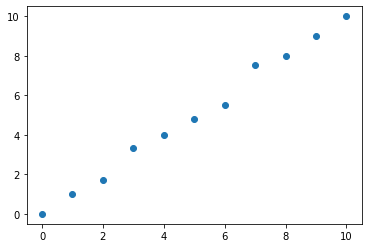

In [10]:
y_squared = [i*i for i in y]
scatter(x, y_squared)
show()

By using our polyfit technique from the scatter plot section, we can create a line of best-fit for this data and calculate its r^2 (coefficient of determination) value

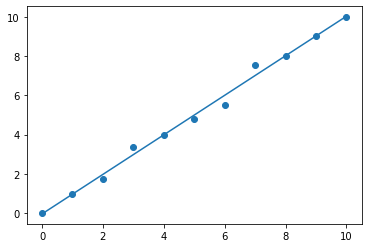

In [12]:
m, b = polyfit(array(x), array(y_squared), 1) # 1 represents one degree of x
scatter(x, y_squared)
plot(x, m*array(x)+b) # array(x) required to multiply by m and add by b
show()

To calculate the coefficient of determination, we can use the following method:

In [14]:
from numpy import corrcoef
correlation_matrix = corrcoef(x, y_squared)
correlation_xy = correlation_matrix[0, 1]
r_squared = correlation_xy**2
r_squared

0.9931691281531067

### Working More with Polyfit and Corrcoef

So how does `polyfit` work? <br>
Well, in short, the method just takes variable data (in our case `x` and `y_squared`) and calculates its coefficients to the degree parameter defined.

These are degrees of a function: <br>
x --> one degree <br>
x^2 --> two degrees <br>
x^5 --> five degrees <br>
So on and so forth <br>

Basically, the degree of a function is the largest exponent value in it's series of terms
***Degrees of a function only work for whole numbers***

If you know what coefficients will be returned, you can set a sequence return like we did: <br>
```py
m, b = polyfit(x, y, 1)
```

We can do this because we know any function that will have one degree will be in the form of y=mx+b, so we know the return will be m and b. However, if the return is unknown, yo ucan just set the return value to a variable, and a numpy array will be returned like the following:


In [15]:
coefficients = polyfit(x, y, 1)
coefficients

array([0.27755382, 0.65025621])

`corrcoef` returns Pearson product-moment correlation coefficients. If you don't know what that is, that's ok, we don't need to go that far in depth. 

All we need to know that for any straight line regression, a 2x2 matrix with the correlation coefficient will be returned. In any case, there will only be two values that are mirrored onto one another for correlation coefficients of a straight line.

In [16]:
example_matrix = corrcoef([1, 2, 3, 4, 5], [3, 4.1, 5.2, 5.9, 7])
example_matrix

array([[1.        , 0.99751037],
       [0.99751037, 1.        ]])

Since there are mirrored values, we only need the one value which is not equal to 1, which will give us our correlation, r. But we need r^2, so we just square the values. In every case, the index `[0, 1]` will not contain the value of 1.

In [18]:
r = example_matrix[0, 1]
r

0.9975103695813372

In [19]:
r_squared = r**2
r_squared

0.995026937422296

Here is another example of another set of data to prove the statements made earlier:

In [22]:
matrix_two = corrcoef([0, 1, 2, 3, 4], [10, 20.1, 30.4, 39.8, 50.1])
print(matrix_two)
r = matrix_two[0, 1]
print(r)
r_squared = r**2
print(r_squared) # print statements were used to display multiple results

[[1.         0.99990633]
 [0.99990633 1.        ]]
0.99990632588303
0.9998126605409001


### Polyfit Without Linearizing

It is possible to fit without linearizing. As physicists, this is not recommended as calculating necessary slopes in lab setups can be difficult without linearizing. However, here's how one would fit data without linearizing. However, `polyfit` only can *polynomial* fit. This means x^n power functions. It cannot fit square roots, logarithms, or exponentials. This is where linearizing would be useful.

Imagine this is our sample graph:

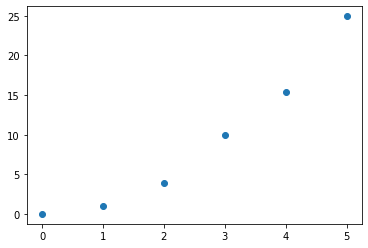

In [27]:
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 3.89, 10.02, 15.34, 24.95]
scatter(x, y)
show()

This can be easily distinguished as a squared function in the form of y=ax^2+bx+c

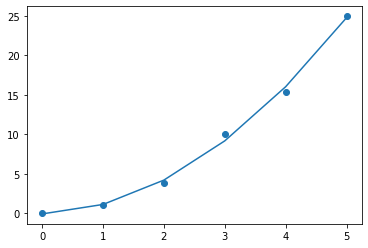

In [28]:
a, b, c = polyfit(x, y, 2)
scatter(x, y)
plot(x, a*(array(x)**2) + b*array(x) + c)
show()

Calculating coefficient of determinations for this type of fit are a little more complicated than the simple linear fit because `corrcoef` specifies that the `y` array needs to have the same shape as `x` for calculations to work. This is why linearization is recommended when working in python for physics purposes.

### More Reading

For more reading on linearization, see this [explanation page](https://www.mrwaynesclass.com/labs/index06.html)

For more reading on polyfit, see the [numpy documentation on polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)

For more reading on corrcoef, see the [numpy documentation on corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)